# Part 1 - ThinkRobots: Marketing Campaign Efficiency

### In this notebook I have already done some data preprocessing in the csv's to check for data cleanliness, remove nulls, check for and amalgamate duplicates and ensure analysis can be performed without any issues.

**NOTE Account AX#33896 was the only duplicate that had an instance of paying and cancelled. Since its oldest start date is the current paying/active account I amalgamated the other charge instances into that account.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from seaborn import pairplot, heatmap
import matplotlib.pyplot as plt
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
cx_segments_df = pd.read_csv('/Users/mitchellambing/desktop/customer_segments.csv', encoding='latin-1')
cx_names_df = pd.read_csv('/Users/mitchellambing/desktop/cust_names.csv', encoding='latin-1')
billing_df = pd.read_csv('/Users/mitchellambing/desktop/billing_status.csv', encoding='latin-1')
product_change_df = pd.read_csv('/Users/mitchellambing/desktop/major_product_changes.csv', encoding='latin-1')

In [3]:
cx_segments_df['Segment'].value_counts()

Marketing Segment 2    402
Marketing Segment 3    344
Marketing Segment 1    254
Name: Segment, dtype: int64

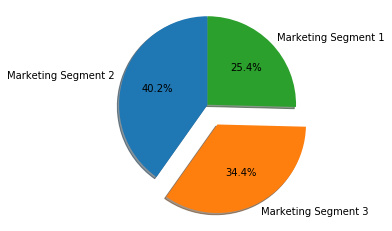

In [4]:
labels = 'Marketing Segment 2', 'Marketing Segment 3', 'Marketing Segment 1'
sizes = [cx_segments_df["Segment"].value_counts()]
explode = (0, 0.25, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Right off the cuff we can see that 40.2% of our users fall into Segment 2, so because that is our largest bucket hopefully we can see strong results from it.

In [5]:
billing_df['Account Status'].value_counts()

paying       872
cancelled    121
Name: Account Status, dtype: int64

In our whole dataset we have 872 paying users and 127 that have cancelled, so later we will look into retention cohorts to see how this is affected in our Segments.

In [6]:
cs_merge = pd.merge(cx_segments_df, billing_df, how='left', on='Billing Account #')

In [7]:
final_df = pd.merge(cx_names_df, cs_merge, how='left', on='Customer ID')
final_df = final_df[['Customer ID', 'First Name', 'Free Account Created Date', 'Last Seen', 'Session Count', 'Segment', 
                    'Billing Account #', 'Account Status', 'Upgraded Account Created Date', 
                     'Upgraded Account Cancelled Date', 'Total Charges']]

In [8]:
final_df = final_df.sort_values(by=['Customer ID'])
final_df.head(3)

,Customer ID,First Name,Free Account Created Date,Last Seen,Session Count,Segment,Billing Account #,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Total Charges
0,1,Joshua,5/29/2017,4/5/2019,1379,Marketing Segment 2,AX#93195,paying,4/2/2019,NaN,145.6
1,2,Ka,12/17/2017,4/27/2019,531,Marketing Segment 1,AX#20438,paying,11/11/2018,NaN,728.0
2,3,Clint,1/30/2017,4/22/2019,317,Marketing Segment 1,AX#60779,paying,3/15/2019,NaN,277.2


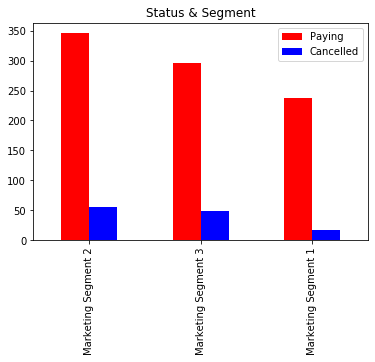

In [9]:
Segment_Check = pd.DataFrame()
Segment_Check['Paying'] = final_df[final_df['Account Status'] == 'paying']['Segment'].value_counts()
Segment_Check['Cancelled'] = final_df[final_df['Account Status'] == 'cancelled']['Segment'].value_counts()
Segment_Check.plot.bar(title = 'Status & Segment', color= 'rb')

So what we can take away from these visualizations is that Segment 2 by far has the most active paying users, but are those paying users providing the most total charges?

In [10]:
df_list1 = final_df[['Customer ID', 'First Name', 'Free Account Created Date', 'Last Seen', 'Session Count', 'Segment', 
                    'Billing Account #', 'Account Status', 'Upgraded Account Created Date', 
                     'Upgraded Account Cancelled Date', 'Total Charges']]
df_list1['Segment 1'] = (final_df['Segment'] == 'Marketing Segment 1')
df_list2 = final_df[['Customer ID', 'First Name', 'Free Account Created Date', 'Last Seen', 'Session Count', 'Segment', 
                    'Billing Account #', 'Account Status', 'Upgraded Account Created Date', 
                     'Upgraded Account Cancelled Date', 'Total Charges']]
df_list2['Segment 2'] = (final_df['Segment'] == 'Marketing Segment 2')
df_list3 = final_df[['Customer ID', 'First Name', 'Free Account Created Date', 'Last Seen', 'Session Count', 'Segment', 
                    'Billing Account #', 'Account Status', 'Upgraded Account Created Date', 
                     'Upgraded Account Cancelled Date', 'Total Charges']]
df_list3['Segment 3'] = (final_df['Segment'] == 'Marketing Segment 3')

In [11]:
segment_1 = (df_list1.loc[df_list1['Segment 1'].isin([True])])
segment_1['Total Charges'].count()
segment_1_charge_amount = segment_1['Total Charges'].sum()

In [12]:
segment_2 = (df_list2.loc[df_list2['Segment 2'].isin([True])])
segment_2['Total Charges'].count()
segment_2_charge_amount = segment_2['Total Charges'].sum()

In [13]:
segment_3 = (df_list3.loc[df_list3['Segment 3'].isin([True])])
segment_3['Total Charges'].count()
segment_3_charge_amount = segment_3['Total Charges'].sum()

In [14]:
print(str(Segment_Check['Paying']))
print('The total charges from Marketing Segment 1 are:' + ' ' + str(segment_1_charge_amount))
print('The total charges from Marketing Segment 2 are:' + ' ' + str(segment_2_charge_amount))
print('The total charges from Marketing Segment 3 are:' + ' ' + str(segment_3_charge_amount))

Marketing Segment 2    346
Marketing Segment 3    296
Marketing Segment 1    237
Name: Paying, dtype: int64
The total charges from Marketing Segment 1 are: 172857.37
The total charges from Marketing Segment 2 are: 230341.41
The total charges from Marketing Segment 3 are: 165500.0


What we can see here is that Marketing Segment 2 has the highest total value in charges at $230,341.40, just over 33% more than the next closest marketing segment group. Marketing Segment 2 also has the most active paying users at 346, so out of total charges we can also do a quick calculation to see avg charge amount/active paying users in each segment.

In [15]:
marketing_1_percent = (172857.37 / 237.00)
marketing_2_percent = (230341.40 / 346.00)
marketing_3_percent = (165500.00 / 296.00)
print('Avg charge amount per segment 1 users is:' + ' ' + str(marketing_1_percent))
print('Avg charge amount per segment 2 users is:' + ' ' + str(marketing_2_percent))
print('Avg charge amount per segment 3 users is:' + ' ' + str(marketing_3_percent))

Avg charge amount per segment 1 users is: 729.3559915611814
Avg charge amount per segment 2 users is: 665.7265895953757
Avg charge amount per segment 3 users is: 559.1216216216217


This is interesting to note when determining highest value users, as even though Segment 1 users only have 237 paying users, their avg total charges is $729.35 per user, making those users the highest value/segmented customers. Of this though Segment 1 isn't providing a lot of active paying users so may need to dive deeper into the performance here.

I think another important piece to look into is which segments have the best retention cohort, which segment has the most sessions and finally do a check on which segment has the most active/recent users.

In [16]:
from datetime import datetime

In [17]:
segment_1['Upgraded Account Created Date'] = pd.to_datetime(segment_1['Upgraded Account Created Date'])
segment_1['Upgraded Account Cancelled Date'] = pd.to_datetime(segment_1['Upgraded Account Cancelled Date'])
segment_1['DateDiff'] = segment_1['Upgraded Account Cancelled Date'] - segment_1['Upgraded Account Created Date']

In [18]:
segment_1['Free Account Created Date'] = pd.to_datetime(segment_1['Free Account Created Date'])
segment_1['DateDiff2'] = segment_1['Upgraded Account Created Date'] - segment_1['Free Account Created Date']

In [19]:
print('For cancelled users in Segment 1, avg datediff from upgrade to cancel is:' + ' ' + str(segment_1['DateDiff'].mean()))
print('For users in Segment 1, avg datediff from free to upgrade is:' + ' ' + str(segment_1['DateDiff2'].mean()))
print('For Segment 1, total accounts are:' + ' ' + str(segment_1['DateDiff'].isnull().count()))

For cancelled users in Segment 1, avg datediff from upgrade to cancel is: 53 days 04:30:00
For users in Segment 1, avg datediff from free to upgrade is: 81 days 03:12:45.354330
For Segment 1, total accounts are: 254


In [20]:
segment_2['Upgraded Account Created Date'] = pd.to_datetime(segment_2['Upgraded Account Created Date'])
segment_2['Upgraded Account Cancelled Date'] = pd.to_datetime(segment_2['Upgraded Account Cancelled Date'])
segment_2['DateDiff'] = segment_2['Upgraded Account Cancelled Date'] - segment_2['Upgraded Account Created Date']

In [21]:
segment_2['Free Account Created Date'] = pd.to_datetime(segment_2['Free Account Created Date'])
segment_2['DateDiff2'] = segment_2['Upgraded Account Created Date'] - segment_2['Free Account Created Date']

In [22]:
print('For cancelled users in Segment 2, avg datediff is:' + ' ' + str(segment_2['DateDiff'].mean()))
print('For users in Segment 2, avg datediff from free to upgrade is:' + ' ' + str(segment_2['DateDiff2'].mean()))
print('For Segment 2, total accounts are:' + ' ' + str(segment_2['DateDiff'].isnull().count()))

For cancelled users in Segment 2, avg datediff is: 87 days 22:42:51.428571
For users in Segment 2, avg datediff from free to upgrade is: 33 days 02:37:36.716417
For Segment 2, total accounts are: 402


In [23]:
segment_3['Upgraded Account Created Date'] = pd.to_datetime(segment_3['Upgraded Account Created Date'])
segment_3['Upgraded Account Cancelled Date'] = pd.to_datetime(segment_3['Upgraded Account Cancelled Date'])
segment_3['DateDiff'] = segment_3['Upgraded Account Cancelled Date'] - segment_3['Upgraded Account Created Date']

In [24]:
segment_3['Free Account Created Date'] = pd.to_datetime(segment_3['Free Account Created Date'])
segment_3['DateDiff2'] = segment_3['Upgraded Account Created Date'] - segment_3['Free Account Created Date']

In [25]:
print('For cancelled users in Segment 3, avg datediff is:' + ' ' + str(segment_3['DateDiff'].mean()))
print('For users in Segment 3, avg datediff from free to upgrade is:' + ' ' + str(segment_3['DateDiff2'].mean()))
print('For Segment 3, total accounts are:' + ' ' + str(segment_3['DateDiff'].isnull().count()))

For cancelled users in Segment 3, avg datediff is: 95 days 12:44:04.897959
For users in Segment 3, avg datediff from free to upgrade is: 34 days 16:44:39.069767
For Segment 3, total accounts are: 344


What is good to note here is that Segment 3 users typically have the longest lifespan of users who do end up cancelling at an avg of 95 days between activation and cancelling, but for total active users Segment 2 is strongest at 402 users. We can also see that users in Segment 2 have the fastest upgrade time going from free to paid users in about 33 days, with Segment 3 not far behind at 34.

Text(0.5, 0, 'Total Sessions')

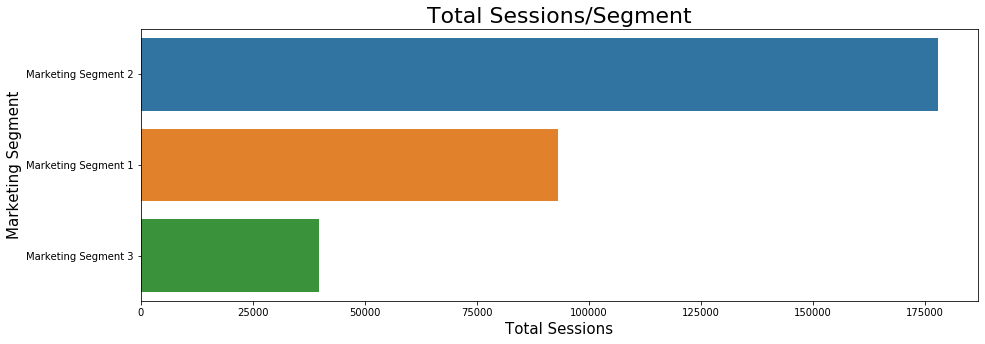

In [26]:
sessions_segment = final_df.groupby(['Segment']).sum().sort_values(['Session Count'], ascending=False).reset_index()[:]
sessions_segment['Session Count'] = sessions_segment['Session Count']
plt.figure(figsize=(15,5)) 
graph = sns.barplot(x=sessions_segment['Session Count'], y=sessions_segment['Segment'])
plt.title('Total Sessions/Segment', fontsize=22)
plt.ylabel('Marketing Segment', fontsize=15)
plt.xlabel('Total Sessions', fontsize=15)

Like our above data would suggest prior to this, Segment 2 also has the heaviest traffic with a session count of over 175,000, and if we dig a little deeper to see how many avg sessions there are per user in each segment we can finish our data understanding off.

In [27]:
print('Segment 1 avg total sessions is:'+ ' '+str(segment_1['Session Count'].sum() / len(segment_1['Customer ID'])))
print('Segment 2 avg total sessions is:'+ ' '+str(segment_2['Session Count'].sum() / len(segment_2['Customer ID'])))
print('Segment 3 avg total sessions is:'+ ' '+str(segment_3['Session Count'].sum() / len(segment_3['Customer ID'])))

Segment 1 avg total sessions is: 366.6968503937008
Segment 2 avg total sessions is: 442.7164179104478
Segment 3 avg total sessions is: 115.87790697674419


On our final check here we can see that the avg total session/user in each segment also has Segment 2 as our best performing segment at 442 total sessions/user on avg.

In final I think it is safe to say that the best performing segment would be Segment 2. It has the highest total of paying users at 346, and the highest total charges at over $230k. It is second to Segment 1 for total charges avg/user, but it makes up for that difference with the total active accounts and quickest time to upgrade at 33 days avg. Segment 2 also has the highest total sessions by a long shot, and hits in an avg sessions/user at 442, and even though it ranks second for avg time between upgrade and cancel (for users that have cancelled), it only sits about 1 week on difference from the top segment.

The deeper numbers though that we should look at would be cancellation rate and avg charges/user, where Segment 1 sits on top with nearly $65 more on average per user for total charges and also a much lower cancellation rate of 6.3%. 

If we’re strictly looking at a monetary value as key here, Segment 2 is where we would want to deem strongest, but if we’re trying to determine quality in users as a whole, efforts should be put towards Segment 1, where retention of that cohort of users is much better, but also have a higher total charge amount/user. That isn’t to take away from Segment 2 though, as Segment 2 had users upgrading faster and averaging far more sessions/user, so depending on what the team is determining as a success, for value in revenue, engagement and quicker conversion Segment 2 wins, but value in potential LTV and retention, Segment 1 wins.

# Part 2 & 3 - Facebook Ads, Success or Fail?

I think there are a few key metrics the marketing team should look at when deeming whether or not Facebook ads turn out to work or not. There are a number of metrics to look into, but I think there are 3 major ones marketing should track.

The first key metric the team should evaluate is the CAC of users through that channel. The goal is to reduce spend but continue to acquire users, but as a new channel that is yet to be determined. I think once the ad starts running and data starts filtering in, gaining a great understanding of how much spend is going into gaining new users from Facebook ads allows the team to properly allocated fundsa in that direction, if an ad runs and gains 3 new users but marketing sopent $300, maybe testing new ad formats should be done.

Another metric is lead conversion rate and subscription conversion rate. How many leads are coming through Facebook ads and how many of those users end up becoming users or paid? Understanding this number will allow the team to improve on the types of users they're targeting and try to improve that conversion rate. 

I think a final key metric to measure ad efficiency is the click through rate. If the ad is seeing a very low click through rate then there might be issues with the copy or visuals on the ad that need to be adjusted, improving on the ctr will generally mean increased users which gives more opportunity for increased paid users.

There are so many metrics and things to track from a data perspective, but really understanding how to utilize that data for improved performance and growth is the important piece. User engagment with your platform and user flows are great indicators of how people interact with the service, and can help begin to segment down to different types of users. Tied in with this, especially for marketing on a whole, the team should track: conversion rates, ROI, generated revenue from marketing channels, Paid CAC, channel performances (SEO, SEM, Email etc), and finally CLV/LTV to understand your customers lifetime value. 